In [1]:
using BoundaryValueDiffEq, Plots

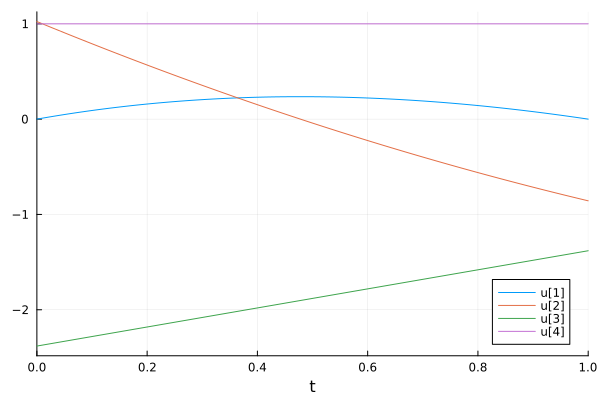

In [6]:
function f!(du, u, p, t)
    du[1] = u[2]
    du[2] = u[3]
    du[3] = u[4]
    du[4] = 0
end
function bc!(resid, sol, p, t)
    solₜ₁ = sol(0.0)
    solₜ₂ = sol(1.0)
    resid[1] = solₜ₁[1]
    resid[2] = solₜ₂[1]
end
xspan = (0.0, 1.0)
u0 = [0.0, 1.0, 0.0, 1.0]
prob = BVProblem(BVPFunction(f!, bc!; bcresid_prototype = zeros(2)), u0, xspan)
sol = solve(prob, MIRK4(), dt = 0.01)
plot(sol)

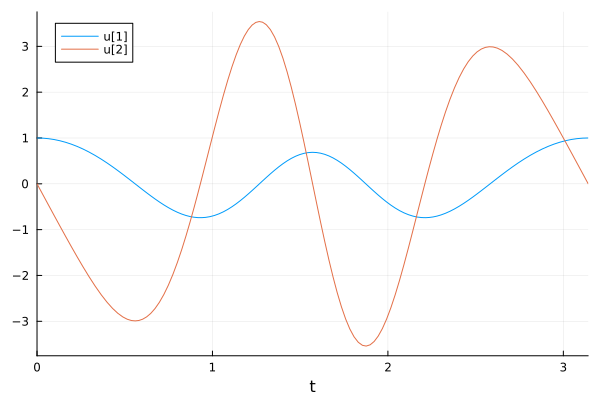

In [ ]:
tspan = (0.0, pi)
function f!(du, u, p, t)
    du[1] = u[2]
    du[2] = -(p[1] - 10 * cos(2 * t)) * u[1]
end
function bca!(res, u, p)
    res[1] = u[2]
    res[2] = u[1] - 1.0
end
function bcb!(res, u, p)
    res[1] = u[2]
end
guess(p, t) = [cos(4t); -4sin(4t)]
bvp = TwoPointBVProblem(f!, (bca!, bcb!), guess, tspan, [15.0],
    bcresid_prototype = (zeros(2), zeros(1)), fit_parameters = true)
sol = solve(bvp, MIRK4(), dt = 0.05)
plot(sol)